# Problema 2

### En el último mes, han llegado muchos más registros de los que puede atender el equipo de crédito. Alguien sugirió crear un modelo para poder decidir a quien prestarle

¿Crees que sea una buena idea? ¿ Por qué?

R//: Sí es una buena idea. Hay varias razones por las que es una buena idea crear un modelo de IA para automatizar procesos:

- Mejora de la eficiencia: La automatización de procesos con IA puede ayudar a reducir el tiempo y los recursos necesarios para completar tareas repetitivas y tediosas. Esto liberaría la carga del equipo y permitiría que se centraran en temas mas importantes y de mayor valor.

- Reducción de errores: Al eliminar la intervención humana en procesos repetitivos, se reduce la posibilidad de errores y se mejora la precisión de los resultados.

- Ahorro de costos: La automatización de procesos puede ayudar a reducir los costos a largo plazo.

- Mejora de la toma de decisiones: Los modelos de IA pueden analizar grandes cantidades de datos en tiempo real y tomar decisiones, lo que puede mejorar la eficiencia y la efectividad en la toma de decisiones.

En resumen, la automatización de procesos con IA puede mejorar la eficiencia, reducir los errores, ahorrar costos y mejorar la toma de decisiones, lo que puede ser una gran ventaja para cualquier organización.

Si la respuesta fue sí, ¿Qué tipo de problema es según los datos que tienes? (Supervisado o No Supervisado)

R//: Es un problema supervisado de clasificación. La sugerencia de crear un modelo para decidir a quién prestarle sugiere que existen datos etiquetados previamente que se pueden utilizar para entrenar el modelo. Es decir, que se tienen registros con información sobre los solicitantes de crédito y se sabe qué solicitantes han sido aprobados o rechazados en el pasado.

Haz las transformaciones que necesites a los datos y desarrolla algún modelo.

In [1]:
#Importar librerias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Cargar el dataset
data_url = "https://raw.githubusercontent.com/resuelve/resuelve-ia-prueba/master/datos_prestamo.csv"
df = pd.read_csv(data_url)
df

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,553,02/27/2019 10:40 AM,02/28/2019 01:10 PM,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [3]:
# Seleccionando features(X) y target(y)
X = df.drop("Estatus_prestamo", axis=1)
y = df["Estatus_prestamo"]

In [4]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir columnas numerias(num_cols) y categoricas(cat_cols)
#Podemos ignorar las variables Fecha_registro, Fecha_contacto, Asesor_asignado y Id ya que no aportan información relevante para el problema.
num_cols = ['Salario', 'Salario_Pareja','Credito_pedido','Plazo_prestamo','Historial_crediticio']
cat_cols = ['Genero', 'Casado', 'Dependientes', 'Educacion', 'Trabaja_para_el', 'Area_vivienda']

In [5]:
# Se crean numeric y categoric pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Se combinan los pipelines con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,num_cols),
        ('cat', categorical_transformer,cat_cols)
    ])

In [6]:
# Se crean los pipelines con los clasificadores
''' Se usa el preprocessor como el primer paso del pipeline,
    luego se escala los datos numericos y luego se aplica uno de los clasificadores
    (RandomForest, Vector Classifier (SVC), Logistic)'''
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler()),
                              ('classifier', RandomForestClassifier())])

pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),
                               ('classifier', SVC())])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler()),
                              ('classifier', LogisticRegression())])


# Se evalua el performance de cada pipelline usando corss-validation para estimar desempeño cada modelo
scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5)
scores_svc = cross_val_score(pipeline_svc, X_train, y_train, cv=5)
scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5)

In [7]:
print('Random Forest Classifier Cross-Validation Puntajes:', scores_rf)
print('Support Vector Classifier Cross-Validation Puntajes:', scores_svc)
print('Logistic Regression Cross-Validation Puntajes:', scores_lr)

Random Forest Classifier Cross-Validation Puntajes: [0.8988764  0.87640449 0.76404494 0.85393258 0.86516854]
Support Vector Classifier Cross-Validation Puntajes: [0.91011236 0.88764045 0.78651685 0.86516854 0.8988764 ]
Logistic Regression Cross-Validation Puntajes: [0.91011236 0.87640449 0.76404494 0.87640449 0.91011236]


In [8]:
# Media y desviacion estandar de los puntajes de cross-validation para cada modelo
print('Random Forest Cross-Validation Puntaje: Mean - %.7g | Std - %.7g' % (np.mean(scores_rf), np.std(scores_rf)))
print('Support Vector Classifier Cross-Validation Puntaje: Mean - %.7g | Std - %.7g' % (np.mean(scores_svc), np.std(scores_svc)))
print('Logistic Regression Cross-Validation Puntaje: Mean - %.7g | Std - %.7g' % (np.mean(scores_lr), np.std(scores_lr)))


# Seleccion del mejor modelo basado en la media del puntaje del cross-validation 
if np.mean(scores_rf) > np.mean(scores_svc) and np.mean(scores_rf) > np.mean(scores_lr):
    best_model = pipeline_rf
elif np.mean(scores_svc) > np.mean(scores_lr):
    best_model = pipeline_svc
else:
    best_model = pipeline_lr
best_model.fit(X_train,y_train)

Random Forest Cross-Validation Puntaje: Mean - 0.8516854 | Std - 0.0462725
Support Vector Classifier Cross-Validation Puntaje: Mean - 0.8696629 | Std - 0.0441503
Logistic Regression Cross-Validation Puntaje: Mean - 0.8674157 | Std - 0.05383887


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Salario', 'Salario_Pareja',
                                                   'Credito_pedido',
                                                   'Plazo_prestamo',
                                                   'Historial_crediticio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Genero', 'Casado',
                                                   'Dependientes', 'Educacion',
                                                   'Trabaja_para_el',
                                                   'Area_vivienda'])])),
                ('scaler', StandardScaler()), ('classifier', SVC())])

In [9]:
# Guardar el modelo
filename = 'best_model.pkl'
joblib.dump(best_model, filename)

['best_model.pkl']

¿Cómo sabes que es un buen modelo?

Para saber si es un buen modelo se tiene que probar con nuevos datos y hacer sus predicciones.

En este caso se utilizaran dos métricas (accuracy_score y confusion_matrix) para determinar si es un buen modelo:

Accuracy_score: Es una medida de cuán preciso es el modelo al predecir las etiquetas de las muestras de datos de prueba.

Confusion_matrix: Con la matriz de confusión, puede evaluar el rendimiento del modelo en términos de sensibilidad (precisión en la identificación de la clase positiva), especificidad (precisión en la identificación de la clase negativa), muestra las predicciones correctas y las predicciones incorrectas del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [10]:
# Cargar el modelo
best_model = joblib.load('/work/best_model.pkl')

In [11]:
# Usar el modelo para hacer predicciones con nueva data
y_predictions = best_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8482142857142857


La métrica de accuracy score es útil para evaluar el rendimiento del modelo en general, ya que mide la proporción de aciertos sobre el total de predicciones.

In [12]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_predictions, labels=['Si','No'])
print('Matriz de confusion:\n', confusion_mat)

Matriz de confusion:
 [[83  0]
 [17 12]]


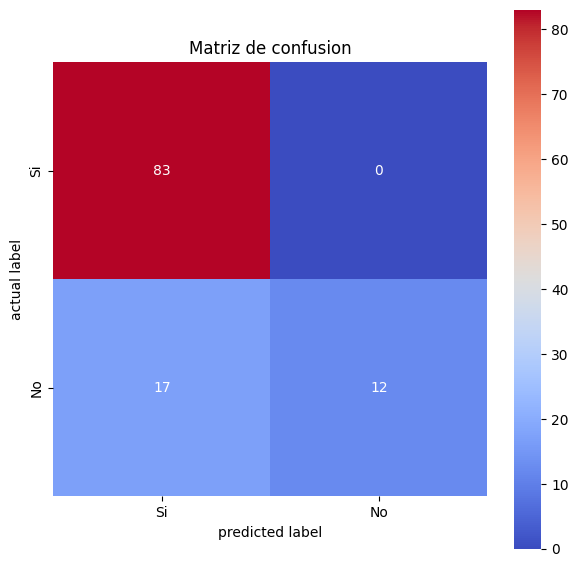

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_mat, annot=True, square=True, cmap='coolwarm')
plt.xticks(ticks=[0.5, 1.5], labels=['Si', 'No'])
plt.yticks(ticks=[0.5, 1.5], labels=['Si', 'No'])
plt.title('Matriz de confusion')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

No se puede determinar si el modelo es bueno o malo basándose únicamente en los valores de la matriz de confusión sin tener en cuenta el contexto y las métricas relevantes para el problema en particular. La matriz de confusión muestra el número de predicciones correctas y incorrectas, pero no da una visión completa de la eficacia del modelo.

Por ejemplo, si el objetivo de la empresa es minimizar el número de falsos negativos (personas que no se les dio el credito pero el modelo predijo que si), entonces una matriz de confusión con un bajo número de falsos negativos sería buena. Pero si el objetivo de la empresa es minimizar el número de falsos positivos (personas que si se les dio el crédito pero el modelo predijo que no), entonces una matriz de confusión con un bajo número de falsos positivos sería buena.

In [14]:
print(f'En este caso, el número de falsos negativos es {confusion_mat[1][0]} y el número de falsos positivos es {confusion_mat[0][1]}.')

En este caso, el número de falsos negativos es 17 y el número de falsos positivos es 0.


Dependiendo de los objetivos de la empresa, es posible que una de estas métricas sea más importante que la otra. Por lo tanto, es importante evaluar cuidadosamente los resultados en relación con los objetivos y la política de la empresa antes de decidir si los resultados son buenos o malos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a6ea7d8-0052-4ecb-93bb-e19b88320538' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>